<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import nltk
import string
import re

In [2]:
#Text Lowercasing
def lowercase_text(text):
    return text.lower()

input_str = "Hello hello"
lowercase_text(input_str)

'hello hello'

In [3]:
!pip install inflect

In [4]:
# import the library
import inflect
q = inflect.engine()
# convert number into string
def convert_number(text):
     # split string into list of text
    temp_str = text.split()
     # initialising empty list
    new_str = []
    for word in temp_str:
        # if text is a digit, convert the digit
        # to numbers and append into new_str list
        if word.isdigit():
            temp = q.number_to_words(word)
            new_str.append(temp)
        # append text as it is
        else:
            new_str.append(word)
# join the text of new_str to form a string
    temp_str = ' '.join(new_str)
    return temp_str
input_str ='You bought a 6 candies from shop, and 4 candies are in home'
convert_number(input_str)

'You bought a six candies from shop, and four candies are in home'

In [5]:
#Remove Punctuation
# lets remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
input_str = "Hey, Are you excited??, After a week, we will be in Shimla!!"
remove_punctuation(input_str)

'Hey Are you excited After a week we will be in Shimla'

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#Remove default stopwords
# import nltk library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# remove stopwords function
def rem_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return filtered_text

ex_text = "Data is the new oil. A.I is the last invention"
rem_stopwords(ex_text)

['Data', 'new', 'oil', 'A.I', 'last', 'invention']

In [10]:
#Stemming
# importing nltk's porter stemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
steml = PorterStemmer()

# stem words in the list of tokenised words
def s_words(text):
    word_tokens = word_tokenize(text)
    stems = [steml.stem(word) for word in word_tokens]
    return stems
text = 'Data is the new oil of the digital economy'
s_words(text)

['data', 'is', 'the', 'new', 'oil', 'of', 'the', 'digit', 'economi']

In [11]:
#Lemmatization
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide some default parts-of-speech values
    lemmas = [lemma.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas
text = 'data is the new oil of the digital economy'
lemmatize_word(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['data', 'be', 'the', 'new', 'oil', 'of', 'the', 'digital', 'economy']

In [12]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [13]:
#Part of Speech (POS) Tagging
# importing tokenize library
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# convert text into word tokens with their tags
def pos_tagging(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)
pos_tagging('You will win a lottery')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('You', 'PRP'), ('will', 'MD'), ('win', 'VB'), ('a', 'DT'), ('lottery', 'NN')]

In [14]:
#Chunking
# importing libraries
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# here we define chunking function with text and regular
# expression representing grammar as parameter
def chunking(text, grammar):
    word_tokens = word_tokenize(text)
    # label words with pos
    word_pos = pos_tag(word_tokens)

    # create a chunk parser using grammar
    chunkParser = nltk.RegexpParser(grammar)
    # test it on the list of word tokens with tagged pos
    tree = chunkParser.parse(word_pos)

    for subtree in tree.subtrees():
        print(subtree)
    #tree.draw()
sentence = 'the little red parrot is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence, grammar)

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


In [15]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [16]:
# Importing tokenization and chunk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

def ner(text):
    # tokenize the text
    word_tokens = word_tokenize(text)

    # pos tagging of words
    word_pos = pos_tag(word_tokens)

    # tree of word entities
    print(ne_chunk(word_pos))

text = 'Brain Lara scored the highest 400 runs in a test match which played in between WI and England.'
ner(text)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  (PERSON Brain/NNP)
  (PERSON Lara/NNP)
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  (ORGANIZATION WI/NNP)
  and/CC
  (GPE England/NNP)
  ./.)


In [17]:
#Regex
import re

sent = "dataset, Data is a new fuel"
r2 = re.findall(r"^\w+", sent)
print(r2)

['dataset']


In [18]:
import re
print(re.split(r'\s', 'We splited this sentence'))

['We', 'splited', 'this', 'sentence']


In [19]:
import re
lists = ['icecream images', 'i immitated', 'inner peace']
for i in lists:
    q = re.match("(i\w+)\W(i\w+)", i)
    if q:
        print(q.groups())

('icecream', 'images')


In [20]:
#Finding Pattern in the text (re.search())
import re

pattern = ["playing", "dataset"]
text = "Raju is playing outside."

for p in pattern:
    print("You're looking for '%s' in '%s'" % (p, text), end = ' ')

    if re.search(p, text):
        print('Found match!')
    else:
        print('no match found!')

You're looking for 'playing' in 'Raju is playing outside.' Found match!
You're looking for 'dataset' in 'Raju is playing outside.' no match found!


In [21]:
#Text Normalization
!pip install --user -U nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from nltk.tokenize.regexp import WhitespaceTokenizer
m = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."

In [3]:
from nltk.tokenize import word_tokenize
text = """Founded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a
multi-planetary species by building a self-sustaining city."""
word_tokenize(text)

['Founded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi-planetary',
 'species',
 'by',
 'building',
 'a',
 'self-sustaining',
 'city',
 '.']

In [5]:
#Frequency Distribution
# from nltk.book import *
import nltk
# nltk.download('gutenberg')
print("\n\n\n")
text1 = "There is no need to panic. We need to work together, take small yet important measures to ensure self-protection."
freqDist = nltk.FreqDist(word_tokenize(text1))
print(freqDist)
print(freqDist["person"])





<FreqDist with 18 samples and 22 outcomes>
0


In [6]:
print(freqDist["is"])

1


In [7]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


18


<Axes: xlabel='Samples', ylabel='Counts'>

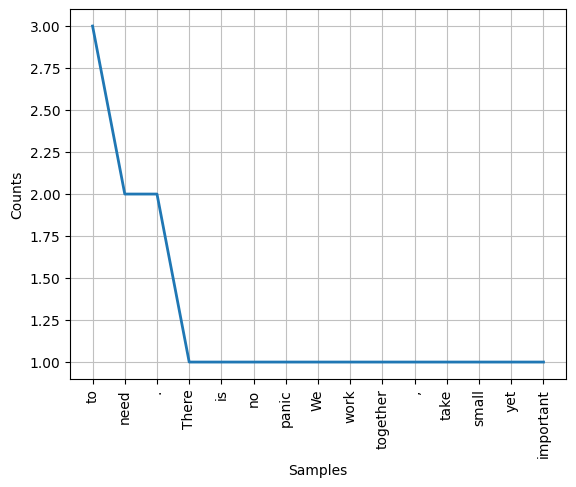

In [9]:
print(len(words))
freqDist.plot(15)